## Experiments with maximum grid points 

This file explores how truncation of the grid points for saving affects the accuracy of the solution.

1. We compute $c(a,z)$ on a large and fine grid (large `grid_max` and `grid_size`), and treat it as the true consumption function.

2. We restrict the grid for saving to $[0, \bar s]$ and compute the consumption function $c(a,z; \bar s)$. 
- Here $\bar s$ is the maximum grid point for saving, equivalent to `grid_max`.

3. We calculate the relative error as a function of $\bar s$:

$$\sup_{(a,z)} \left| \frac{c(a,z; \bar s)}{c(a,z)} - 1 \right|.$$

In [1]:
run optimality

In [2]:
tol = 1e-5
cp = ConsumerProblem(grid_med=10., grid_max=1e6, grid_size=1000)

In [3]:
err, sG_space = err_func(cp,          # an event for solving the "true" consumption function
                         sG_min=10.,  # the max grid point for saving ̄s 
                         tol=tol)     # the tolerance level to terminate the time iteration algorithm

Alternatively, one can uncomment the next block and read the saved data to avoid computing once again.

In [3]:
#data = np.load('simulated data/ex_grid_max.dat.npz')
#sG_space = data['sG_space']
#err = data['err']

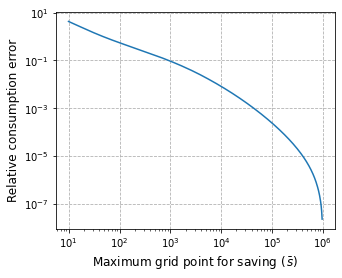

In [4]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(sG_space[:-1], err[:-1])
ax.set_xlabel('Maximum grid point for saving ($\\bar{\,s}$)', fontsize=12)
ax.set_ylabel('Relative consumption error', fontsize=12)
ax.grid(ls='--')
#ax.tick_params(labelsize=11)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('fig_gmax.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

In [14]:
#np.savez('simulated data/ex_grid_max.dat', sG_space=sG_space, err=err)